In [1]:
import numpy as np
import pandas as pd
import joblib

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

In [2]:
train_df = pd.read_csv('./data/fl_2022_FullName_train.csv.gz')
val_df = pd.read_csv('./data/fl_2022_FullName_val.csv.gz')
test_df = pd.read_csv('./data/fl_2022_FullName_test.csv.gz')

In [3]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(7214894, 9)
(901862, 9)
(901862, 9)


In [4]:
train_df.head()

,full_name,asian,hispanic,nh_black,nh_white,other,total_n,race,race_code
0,Veit Karen,0.0,0.0,0.0,1.0,0.0,2.0,nh_white,3
1,Barahona Octavio,0.0,1.0,0.0,0.0,0.0,1.0,hispanic,1
2,Albert Jurieal,0.0,0.0,1.0,0.0,0.0,1.0,nh_black,2
3,Foco Kevin,0.0,0.0,0.0,1.0,0.0,1.0,nh_white,3
4,Ewen Deborah,0.0,0.0,0.0,1.0,0.0,1.0,nh_white,3


## Extract features

In [63]:
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 2), min_df=50, lowercase=False)

In [64]:
X_train = vectorizer.fit_transform(train_df['full_name'])
X_val = vectorizer.transform(val_df['full_name'])
X_test = vectorizer.transform(test_df['full_name'])

In [65]:
X_train.shape

(7214894, 1267)

In [66]:
X_val.shape

(901862, 1267)

In [67]:
X_test.shape

(901862, 1267)

In [68]:
vectorizer.get_feature_names_out()

array([' ', " '", ' -', ..., 'zw', 'zy', 'zz'], dtype=object)

In [69]:
len(vectorizer.get_feature_names_out())

1267

In [70]:
vocab = vectorizer.get_feature_names_out()

In [71]:
y_train = train_df.race_code
y_val = val_df.race_code
y_test = test_df.race_code

In [72]:
y_train[0]

3

In [73]:
#Create a Gaussian Classifier
clf = GradientBoostingClassifier(random_state=42, verbose=6)

In [74]:
print(X_train.shape)
print(X_test.shape)

(7214894, 1267)
(901862, 1267)


In [75]:
type(X_train)

scipy.sparse._csr.csr_matrix

## Training

## Doing it for 1 million with 100 iterations

In [79]:
%time
# 1 million
samples = 100 * 100 * 100

tr_df = train_df.sample(samples)
X_tr = vectorizer.transform(tr_df['full_name'])
y_tr = tr_df.race_code

clf.fit(X_tr, y_tr)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 16.2 µs
      Iter       Train Loss   Remaining Time 
         1           1.0630           63.65m
         2           1.0401           61.77m
         3           1.0209           61.61m
         4           1.0073           60.39m
         5           0.9962           60.00m
         6           0.9851           59.38m
         7           0.9754           58.55m
         8           0.9669           57.99m
         9           0.9604           57.35m
        10           0.9539           56.75m
        11           0.9483           56.19m
        12           0.9430           55.66m
        13           0.9381           55.23m
        14           0.9335           54.77m
        15           0.9297           54.02m
        16           0.9257           53.36m
        17           0.9220           52.68m
        18           0.9185           52.01m
        19           0.9152           51.39m
        20           0.9124        

GradientBoostingClassifier(random_state=42, verbose=6)

In [80]:
%%time
y_pred = clf.predict(X_val)
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:", metrics.accuracy_score(y_val, y_pred))

Test Accuracy: 0.7080296098516181
CPU times: user 12.8 s, sys: 1.44 s, total: 14.3 s
Wall time: 19.8 s


In [81]:
%%time
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

Test Accuracy: 0.7075339686116058
CPU times: user 10.4 s, sys: 1.2 s, total: 11.6 s
Wall time: 15.1 s


In [82]:
joblib.dump(vectorizer, "models/gb_vec_fullname_1M.joblib", compress=3)  # compression is ON!

['models/gb_vec_fullname_1M.joblib']

In [83]:
joblib.dump(clf, "models/gb_model_fullname_1M.joblib", compress=3)  # compression is ON!

['models/gb_model_fullname_1M.joblib']

## Doing it for 2 million with 100 iterations

In [84]:
%%time
#Train the model using the training sets y_pred=clf.predict(X_test)
clf = GradientBoostingClassifier(random_state=42, verbose=6)

# 2 million
samples = 2 * 100 * 100 * 100
# 1 million records took 2h 10min 13s
# 2 million records took 3h 50 mins
# 8 million records will take ~17 hours

tr_df = train_df.sample(samples)
X_tr = vectorizer.transform(tr_df['full_name'])
y_tr = tr_df.race_code

clf.fit(X_tr, y_tr)

      Iter       Train Loss   Remaining Time 
         1           1.0630          172.90m
         2           1.0416          168.42m
         3           1.0223          164.00m
         4           1.0091          160.43m
         5           0.9963          157.65m
         6           0.9854          155.09m
         7           0.9760          152.11m
         8           0.9688          150.05m
         9           0.9613          148.25m
        10           0.9551          146.52m
        11           0.9491          144.67m
        12           0.9439          142.53m
        13           0.9389          140.55m
        14           0.9342          138.75m
        15           0.9303          136.80m
        16           0.9262          135.04m
        17           0.9225          133.29m
        18           0.9187          131.63m
        19           0.9156          129.74m
        20           0.9128          127.36m
        21           0.9094          125.07m
        2

GradientBoostingClassifier(random_state=42, verbose=6)

In [85]:
%%time
y_pred = clf.predict(X_val)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.7082735496118031
CPU times: user 18.2 s, sys: 1.16 s, total: 19.4 s
Wall time: 26.7 s


In [86]:
%%time
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7077767995546991
CPU times: user 10.2 s, sys: 957 ms, total: 11.1 s
Wall time: 13 s


In [87]:
joblib.dump(vectorizer, "models/gb_vec_fullname_2M.joblib", compress=3)  # compression is ON!

['models/gb_vec_fullname_2M.joblib']

In [88]:
joblib.dump(clf, "models/gb_model_fullname_2M.joblib", compress=3)  # compression is ON!

['models/gb_model_fullname_2M.joblib']

# Now lets do for the whole train dataset with 20 iterations

In [89]:
%%time

clf = GradientBoostingClassifier(n_estimators=20, random_state=42, verbose=6)
clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.0629          119.29m
         2           1.0399          108.12m
         3           1.0232          100.65m
         4           1.0072           94.18m
         5           0.9965           88.46m
         6           0.9851           82.43m
         7           0.9755           76.54m
         8           0.9671           70.51m
         9           0.9608           64.74m
        10           0.9540           58.86m
        11           0.9481           52.99m
        12           0.9429           46.99m
        13           0.9381           41.08m
        14           0.9336           35.17m
        15           0.9296           29.38m
        16           0.9256           23.52m
        17           0.9218           17.64m
        18           0.9182           11.79m
        19           0.9151            5.90m
        20           0.9119            0.00s
CPU times: user 1h 54min 15s, sys: 4min 28s, total: 1h

GradientBoostingClassifier(n_estimators=20, random_state=42, verbose=6)

In [90]:
%%time
y_pred = clf.predict(X_val)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.6771745566394859
CPU times: user 4.21 s, sys: 2.93 s, total: 7.14 s
Wall time: 10.3 s


In [91]:
%%time
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6768762848418051
CPU times: user 4.33 s, sys: 737 ms, total: 5.07 s
Wall time: 7.34 s


In [92]:
joblib.dump(vectorizer, "models/gb_vec_fullname.joblib", compress=3)  # compression is ON!

['models/gb_vec_fullname.joblib']

In [93]:
joblib.dump(clf, "models/gb_model_fullname.joblib", compress=3)  # compression is ON!

['models/gb_model_fullname.joblib']

## Confusion Matrix

In [94]:
race_id_df = train_df[['race', 'race_code']].drop_duplicates().sort_values('race_code')
race_to_id = dict(race_id_df.values)

In [95]:
race_to_id

{'asian': 0, 'hispanic': 1, 'nh_black': 2, 'nh_white': 3, 'other': 4}

In [96]:
id_to_race = dict(race_id_df[['race_code', 'race']].values)

In [97]:
id_to_race

{0: 'asian', 1: 'hispanic', 2: 'nh_black', 3: 'nh_white', 4: 'other'}

### For 1M model

In [98]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


              precision    recall  f1-score   support

       asian       0.75      0.11      0.20     25756
    hispanic       0.78      0.56      0.65    163525
    nh_black       0.75      0.09      0.16    133471
    nh_white       0.70      0.96      0.81    552737
       other       0.38      0.01      0.01     26373

    accuracy                           0.71    901862
   macro avg       0.67      0.35      0.37    901862
weighted avg       0.71      0.71      0.64    901862



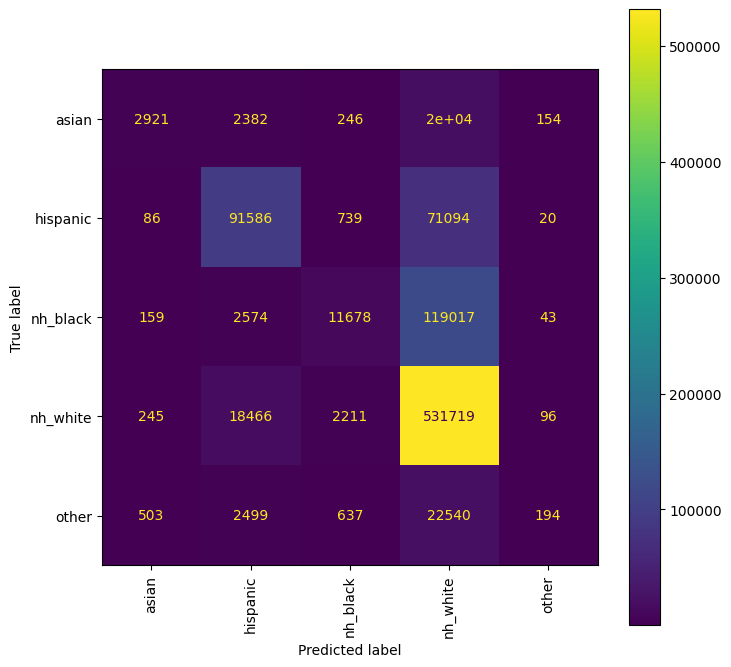

In [99]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline  

model_1m = joblib.load('models/gb_model_fullname_1M.joblib')
preds = model_1m.predict(X_test)
predicted = [id_to_race[p] for p in preds]
actual = [id_to_race[p] for p in y_test.values]

print(classification_report(actual, predicted))

cm = confusion_matrix(actual, predicted, labels=list(race_to_id.keys()))
cmp = ConfusionMatrixDisplay(cm, display_labels=list(race_to_id.keys()))
fig, ax = plt.subplots(figsize=(8,8))
cmp.plot(ax=ax, xticks_rotation='vertical')

In [100]:
for class_id in id_to_race:
    correct = np.sum((y_test == class_id) & (preds == class_id))
    total = np.sum(y_test == class_id)
    print(f'Accuracy for class {id_to_race[class_id]}: {correct / total:.2f}')

Accuracy for class asian: 0.11
Accuracy for class hispanic: 0.56
Accuracy for class nh_black: 0.09
Accuracy for class nh_white: 0.96
Accuracy for class other: 0.01


### For 2M Model

              precision    recall  f1-score   support

       asian       0.76      0.11      0.19     25756
    hispanic       0.78      0.56      0.65    163525
    nh_black       0.77      0.09      0.16    133471
    nh_white       0.70      0.96      0.81    552737
       other       0.37      0.01      0.02     26373

    accuracy                           0.71    901862
   macro avg       0.67      0.35      0.36    901862
weighted avg       0.71      0.71      0.64    901862



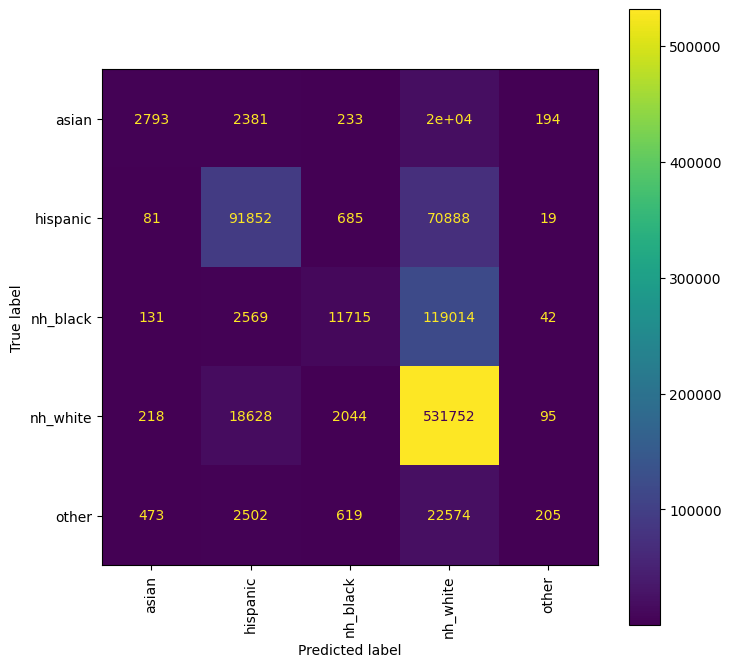

In [101]:
model_2m = joblib.load('models/gb_model_fullname_2M.joblib')
preds = model_2m.predict(X_test)
predicted = [id_to_race[p] for p in preds]
actual = [id_to_race[p] for p in y_test.values]

print(classification_report(actual, predicted))

cm = confusion_matrix(actual, predicted, labels=list(race_to_id.keys()))
cmp = ConfusionMatrixDisplay(cm, display_labels=list(race_to_id.keys()))
fig, ax = plt.subplots(figsize=(8,8))
cmp.plot(ax=ax, xticks_rotation='vertical')

In [102]:
for class_id in id_to_race:
    correct = np.sum((y_test == class_id) & (preds == class_id))
    total = np.sum(y_test == class_id)
    print(f'Accuracy for class {id_to_race[class_id]}: {correct / total:.2f}')

Accuracy for class asian: 0.11
Accuracy for class hispanic: 0.56
Accuracy for class nh_black: 0.09
Accuracy for class nh_white: 0.96
Accuracy for class other: 0.01


### For Model trained  with complete dataset (20 iterations)

              precision    recall  f1-score   support

       asian       0.86      0.04      0.08     25756
    hispanic       0.82      0.40      0.54    163525
    nh_black       0.77      0.01      0.03    133471
    nh_white       0.66      0.98      0.79    552737
       other       0.38      0.00      0.00     26373

    accuracy                           0.68    901862
   macro avg       0.70      0.29      0.29    901862
weighted avg       0.70      0.68      0.59    901862



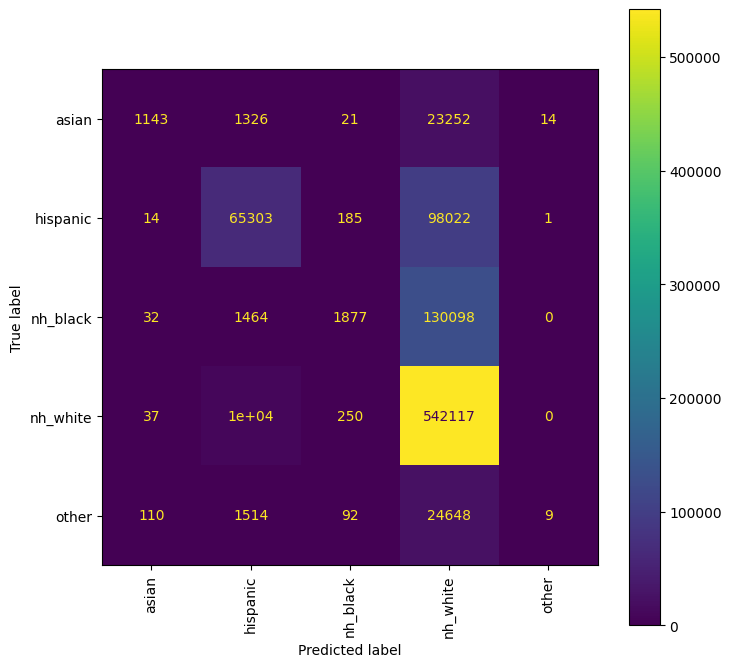

In [103]:
model_full = joblib.load('models/gb_model_fullname.joblib')
preds = model_full.predict(X_test)
predicted = [id_to_race[p] for p in preds]
actual = [id_to_race[p] for p in y_test.values]

print(classification_report(actual, predicted))

cm = confusion_matrix(actual, predicted, labels=list(race_to_id.keys()))
cmp = ConfusionMatrixDisplay(cm, display_labels=list(race_to_id.keys()))
fig, ax = plt.subplots(figsize=(8,8))
cmp.plot(ax=ax, xticks_rotation='vertical')

In [104]:
for class_id in id_to_race:
    correct = np.sum((y_test == class_id) & (preds == class_id))
    total = np.sum(y_test == class_id)
    print(f'Accuracy for class {id_to_race[class_id]}: {correct / total:.2f}')

Accuracy for class asian: 0.04
Accuracy for class hispanic: 0.40
Accuracy for class nh_black: 0.01
Accuracy for class nh_white: 0.98
Accuracy for class other: 0.00
